## Some basic plotting experiments

This notebook contains some basic plotting experiments, and explores a few libraries available in Python.  We start with the familiar matplotlib, and attempt to clean-up its presentation.


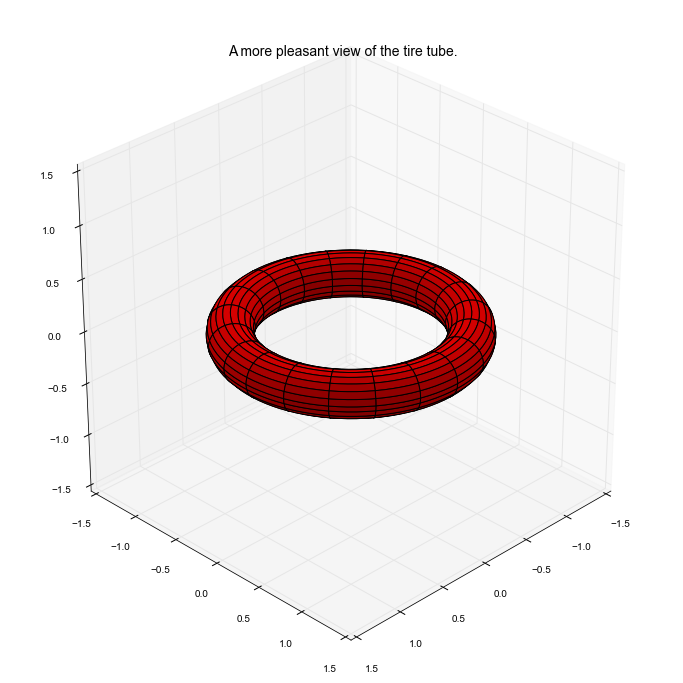

In [9]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111, projection='3d')

t1 = np.linspace(0, 2*np.pi, 100)
t2 = np.linspace(0, 2*np.pi, 100)

## we use outer to form a doubly-indexed list of numbers.
## alternatively one could form the doubly-index list
## beforehand...
bigR = 1.0
smR = 0.2
x1 = np.outer( (bigR+smR*np.cos(t1)), np.cos(t2) )
y1 = np.outer( (bigR+smR*np.cos(t1)), np.sin(t2) )
z1 = np.outer( smR*np.sin(t1), np.ones(np.size(t2)) ) 

ax.set_title('A more pleasant view of the tire tube.', fontsize=14)
ax.plot_surface(x1, y1, z1, rstride=5,cstride=5, color='r', shade=True)

## here is a fairly nice way to set a common aspect ratio
scl = np.array([getattr(ax,'get_{}lim'.format(dim))() for dim in 'xyz'])
ax.auto_scale_xyz(*[[np.min(scl),np.max(scl)]]*3)

## elev sets how far up from the xy-plane we arein.
## azim is the angle from the xz-plane
ax.view_init(elev=30,azim=45)
plt.show()

You might say *that's nice* **but** it's also a little primitive.  If you would like to get serious about creating pleasing plots in Python, there are some more serious visualization libraries.

 * Mayavi (http://docs.enthought.com/mayavi/mayavi) available with apt-get install mayavi2
 * VPython (http://www.vpython.org) available with apt-get install python-visual
 * VisPy (http://vispy.org) install via sudo pip install vispy
 * Python SciTools (https://github.com/hplgit/scitools) available with apt-get install python-scitools
 * Visualization Toolkit VTK (http://www.vtk.org/) available with apt-get install python-vtk (for version 5) and  python-vtk6 for version 6.  
 
My initial impression is VTK, Mayavi and Python SciTools have the most pleasant and flexible rendering engine.  All three use the VTK library.  The VTK library has good documentation on-line but it is something of a *power user* visualization toolkit, where one might have to write a significant amount of code to get your displays *just right*.   

A significant problem is currently VTK only supports Python 2, and so Mayavi also requires Python 2.  Python SciTools uses several visualisation engines, and runs on both Python 2 and 3.  But the Mayavi engine will not run in Python 3. 

The other libraries strive more for convenience, rather than flexibility and precision.  In my initial explorations I've found Mayavi the best compromise between ease-of-use and informative graphics. 


In [ ]:
## A VPython sample.  This appears to be much like a basic rendering package
## unfortunately, you need to be running ipython with the Python 2 engine 
## to use this toolbox -- it has not been ported to Python 3 yet. 
import visual as v
redbox = v.box(pos=v.vector(4,2,3),size=(8,4,6),color=v.color.red)
ball=v.sphere(pos=v.vector(4,7,3),radius=2,color=v.color.green)

In [ ]:
## A Mayavi sample. This appears far more sophisticated.
##  grabbed from the above Mayavi website

## This library also only works for Python 2. 

import numpy as np
from mayavi import mlab

## increments pi/250.
dphi, dtheta = np.pi/250.0, np.pi/250.0
## this specifies a 2-dimensional grid. It takes a list of elements of the
## form ak:bk:sk the length of which is the dimension of the grid.  ak is
## the left endpoint, bk the right, sk the step size.
[phi,theta] = np.mgrid[0:np.pi+dphi*1.5:dphi,0:2*np.pi+dtheta*1.5:dtheta]
m0 = 4; m1 = 3; m2 = 2; m3 = 3; m4 = 6; m5 = 2; m6 = 6; m7 = 4;
r = np.sin(m0*phi)**m1 + np.cos(m2*phi)**m3 + np.sin(m4*theta)**m5 + np.cos(m6*theta)**m7
x = r*np.sin(phi)*np.cos(theta)
y = r*np.cos(phi)
z = r*np.sin(phi)*np.sin(theta)

# View it.
s = mlab.mesh(x, y, z)
mlab.show()

In [ ]:
## Let's try the helical spiral in Mayavi.

outRad = 2.2
inRad = 0.5
rN = 40

tStart = 0
tEnd = 8*np.pi
tN = 20

[theta, rad] = np.mgrid[tStart:tEnd:np.pi/tN, inRad:outRad:1.0/rN]

x = rad*np.cos(theta)
y = rad*np.sin(theta)
z = theta/5

s = mlab.mesh(x,y,z)
mlab.show()


In [ ]:
## And let's jazz it up a little. 

outRad = 2.2
inRad = 0.5
rN = 40

tStart = 0
tEnd = 8*np.pi
tN = 80

## the helix
[theta, rad] = np.mgrid[tStart:tEnd:np.pi/tN, inRad:outRad:1.0/rN]
x = rad*np.cos(theta)
y = rad*np.sin(theta)
z = theta/5
s = mlab.mesh(x,y,z)

## the central axis
mlab.plot3d([0,0], [0,0], [0, tEnd/5], tube_radius=0.2, tube_sides=20)

## outer ridge
theta = np.mgrid[tStart:tEnd:np.pi/tN]
mlab.plot3d(outRad*np.cos(theta), outRad*np.sin(theta), theta/5, 
            tube_radius=0.02, tube_sides=10, color=(0.2,0.2,0.4))

## inner ridge
mlab.plot3d(inRad*np.cos(theta), inRad*np.sin(theta), theta/5, 
            tube_radius=0.02, tube_sides=10, color=(0.2,0.2,0.4))


mlab.show()

In [ ]:
## Mayavi also is happy with "implicitly defined" surfaces
## i.e. solution sets f(x,y,z) = 0

bd = 1.1
x,y,z = np.ogrid[-bd:bd:240j, -bd:bd:240j, -bd:bd:240j]
F = ((x**2+y**2-0.85**2)**2 + (z**2-1)**2)*((y**2+z**2-0.85**2)**2 + (x**2-1)**2)*((z**2+x**2-0.85**2)**2 + (y**2-1)**2)
mlab.contour3d(F, contours=[0.03], color=(0.5,1,1))
mlab.contour3d(F, contours=[0.90], color=(1,0,0))
#mlab.contour3d(F, contours=[4], color=(0,1,0))
#mlab.contour3d(F, contours=[-4], color=(0,0,1))

mlab.show()


In [10]:
#vispy.test()
#vispy.sys_info()

## Vispy has some features similar to matplotlib
import vispy.mpl_plot as plt
fig=plt.figure()
ax=plt.subplot(111)

x = [2*np.pi*float(i)/100 for i in range(100)]
y = np.sin(x)

ax.plot(x, y, 'k-')
plt.show(True)




/usr/local/lib/python2.7/dist-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)


[<SceneCanvas (wx) at 0x7f2530129f10>]